In [2]:
from google.colab import files
uploaded = files.upload()

Saving movies.dat to movies.dat
Saving ratings.dat to ratings.dat
Saving users.dat to users.dat


In [9]:
#loading datasets
import pandas as pd

movies = pd.read_csv('movies.dat', sep='::',encoding='latin-1',engine='python', names=['MovieID','Title','Genres'])
ratings = pd.read_csv('ratings.dat', sep='::',encoding='latin-1',engine='python', names=['UserID','MovieID', 'Rating','Timestamp'])
users = pd.read_csv('users.dat', sep='::',encoding='latin-1',engine='python', names=['UserID','Gender','Age','Occupation','Zip-code'])

print("Movies:")
display(movies.head())
print("\nRatings:")
display(ratings.head())
print("\nUsers:")
display(users.head())

Movies:


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy



Ratings:


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291



Users:


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
#checking for any missing values
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(users.isnull().sum())

MovieID    0
Title      0
Genres     0
dtype: int64
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [11]:
#converting timestamp to datestamp
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'],unit='s')

In [13]:
#merging datasets for analysis
data = pd.merge(ratings,users, on='UserID')
data = pd.merge(data, movies, on='MovieID')
data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


<Axes: title={'center': 'Top 10 Most Rated Movies'}, ylabel='Title'>

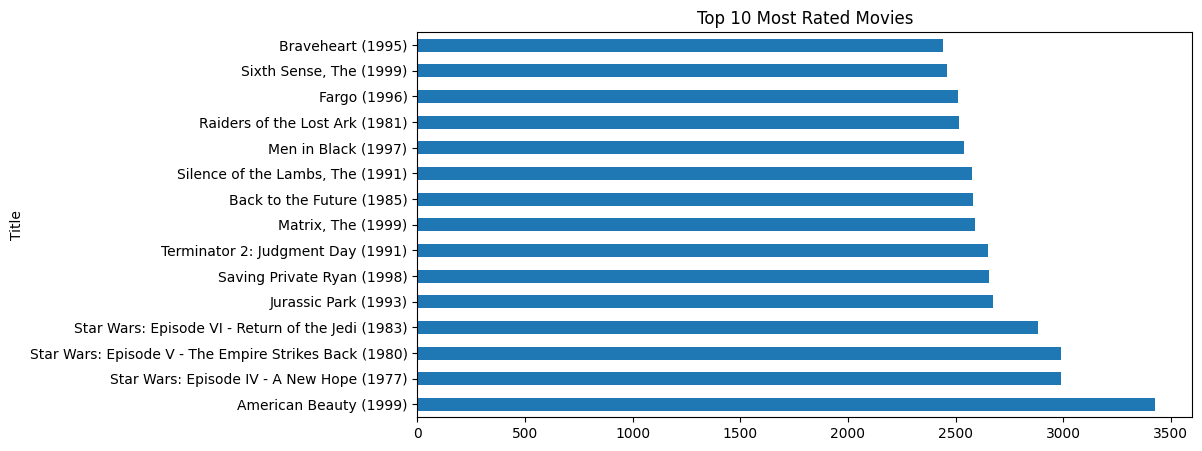

In [14]:
#exploratory data analysis (Top Movies)
movies_top = data.groupby('Title')['Rating'].count().sort_values(ascending=False).head(15)
movies_top.plot(kind='barh', title ='Top 10 Most Rated Movies', figsize=(10,5))

<Axes: title={'center': 'Average Rating by Age'}, xlabel='Age'>

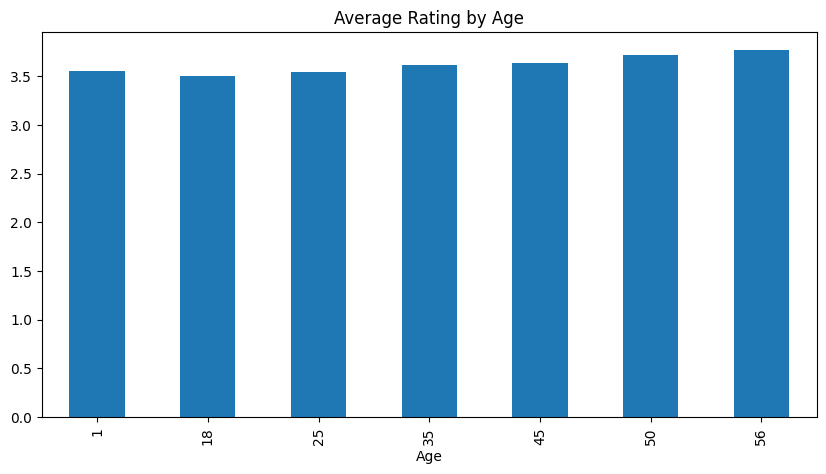

In [15]:
#exploratory data analysis (Average age grouping)
age_group_rate = data.groupby('Age')['Rating'].mean()
age_group_rate.plot(kind = 'bar', title = 'Average Rating by Age', figsize=(10,5))

Text(0.5, 1.0, 'Gender Rating Distribution System')

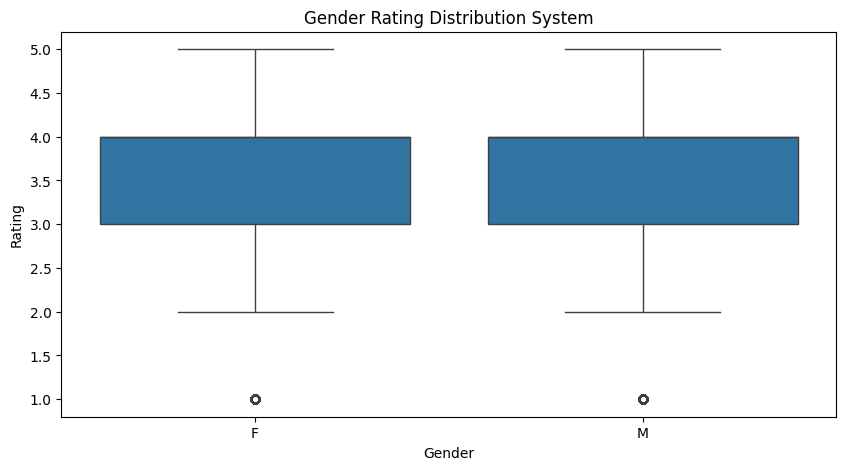

In [25]:
#gender based preferences to the movies
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Rating',data=data)
plt.title('Gender Rating Distribution System')

In [26]:
gender_movie = data.groupby(['Gender','Title'])['Rating'].mean().reset_index()
movie_male = gender_movie[gender_movie['Gender'] == 'M'].sort_values(by='Rating',ascending = False).head(5)
movie_female = gender_movie[gender_movie['Gender'] == 'F'].sort_values(by='Rating',ascending = False).head(5)

In [28]:
print("Top Movies preferred by Males:")
print(movie_female)
print("Top Movies preferred by Females:")
print(movie_male)

Top Movies preferred by Males:
     Gender                                 Title  Rating
683       F                    Coldblooded (1995)     5.0
663       F  Clean Slate (Coup de Torchon) (1981)     5.0
790       F                     Dancemaker (1998)     5.0
2844      F                  Skipped Parts (2000)     5.0
731       F                   Country Life (1994)     5.0
Top Movies preferred by Females:
     Gender                               Title  Rating
4764      M  Gate of Heavenly Peace, The (1995)     5.0
6924      M             Ulysses (Ulisse) (1954)     5.0
3727      M                    Baby, The (1973)     5.0
5485      M                        Lured (1947)     5.0
4672      M             Follow the Bitch (1998)     5.0
